In [2]:
from PIL import Image
from pylab import *

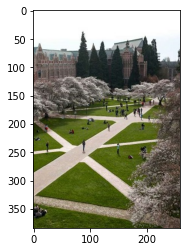

In [3]:
im = Image.open('uw.png')
imshow(im)

# Gray Scale

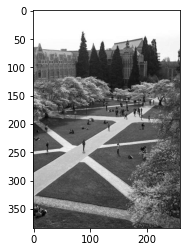

In [4]:
# gray scale
im_gray = im.convert('L')
imshow(im_gray, cmap='gray')

In [5]:
im_m = array(im)
im_m.shape # hight, weight, RGB+alpha

(384, 259, 4)

# Cropped Image

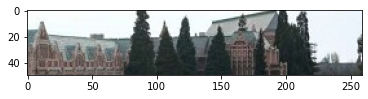

In [6]:
im_c = im_m[50:100,:,:]
#crop image
imshow(im_c)

# Negative Image

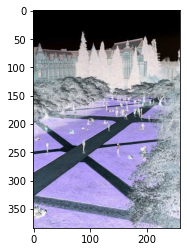

In [7]:
# negative image, substracting 255
im_n = 255 - im_m[:,:,:-1] # -1 to exclude the alpha, only get the negative of RGB
imshow(im_n)

In [8]:
im_n.shape

(384, 259, 3)

In [9]:
# gray-colored image contains only 2D array(hight, width)
im_gray_m= array(im_gray)
im_gray_m.shape

(384, 259)

# Flatten to 1D 

In [10]:
# flatten, make it 1 dimensional, to analyze it statistically
im_gray_f = im_gray_m.flatten()
im_gray_f.shape

(99456,)

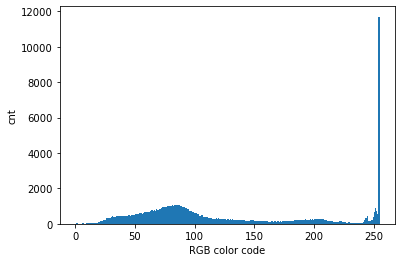

In [25]:
import matplotlib.pyplot as plt
plt.hist(im_gray_f, bins=256)
plt.ylabel('cnt')
plt.xlabel('RGB color code')
plt.show()

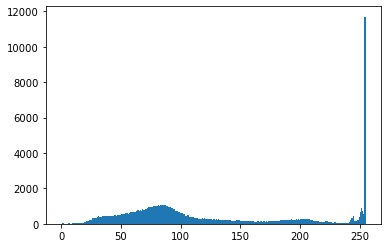

In [26]:
figure()
hist_0 = hist(im_gray_f, bins=256)

# Enhance Contrast (Imange Normalization)

If color codes in the histogram are concentrated, it is hard to recognizr objects in the image.
Hence, we need to adjust the distribution of colors, making all intensities as equally common as possible(stepwise distribution). 


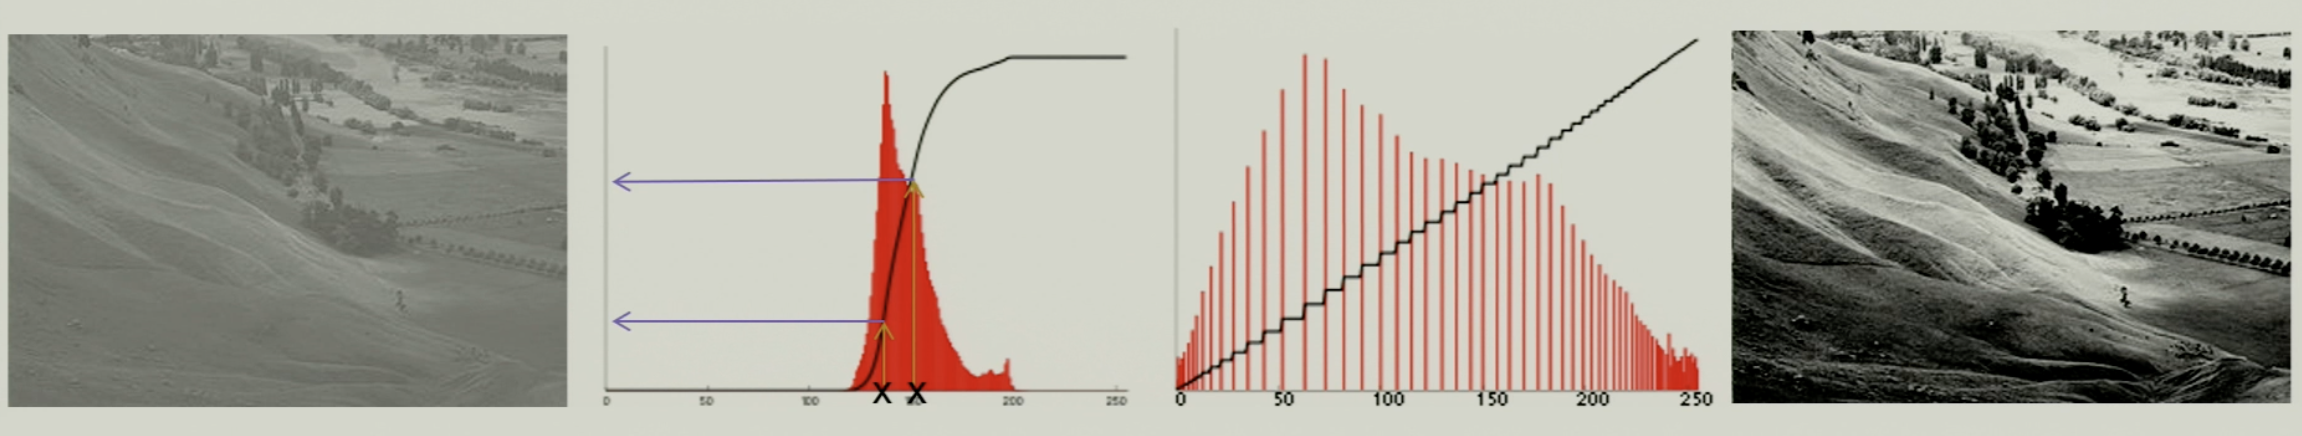

In [12]:
# change distribution to cdf(cumulative dist. func.), to reassign the value 
imhist, bins = histogram(im_gray_f, bins=256, density = True)
cdf = imhist.cumsum() #cumulative dist
# map culmulative percentile to 0~255
# to avoid rouding error, divide it by the last number(should to 1, but it actually is just close to 1)
cdf = 255 * cdf / cdf[-1]

In [34]:
# store new values, interp=fill in new vals.
# orginal val, bins, new val. Remove the last bin
im2 = interp(im_gray_f, bins[:-1,], cdf )

# turn back to 2D(gray scale image's shape) 
im_norm = im2.reshape(im_gray_m.shape)

1.0039215686274503

Text(0.5, 1.0, 'Original')

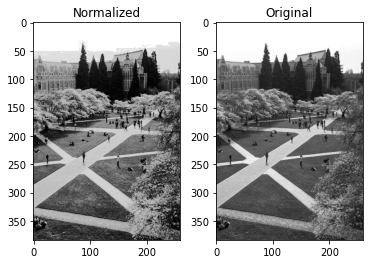

In [13]:
# display
fig, ax = plt.subplots(1,2)
ax[0].imshow(im_norm, cmap='gray')
ax[1].imshow(im_gray_m, cmap='gray')
ax[0].set_title('Normalized')
ax[1].set_title("Original")

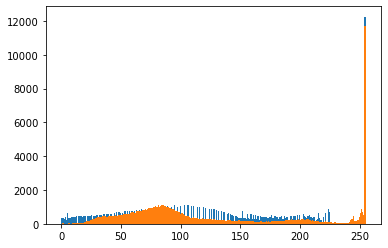

In [14]:
figure()
hist_1 = hist(im2, 256)
hist_2 = hist(im_gray_f, 256)